# Decision Tree

데이터에 있는 규칙을 학습을 통해 자동적으로 찾아내 트리 기반의 분류 규칙을 만드는 것. <br>
핵심 키워드 : `균일도`

__루트노드,규칙노드,리프노드__

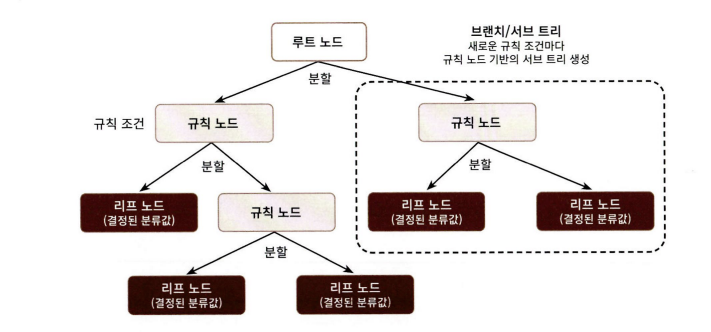

주의 : 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기고, 이는 곧 과적합으로 이어지기 쉽다. 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

__균일한 데이터 세트로 분할해야 한다.__

- 균일한 데이터? <br>
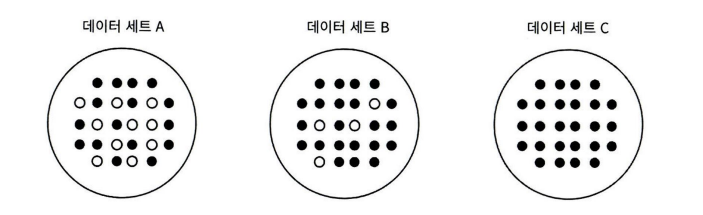 <br>
균일도 순 : C > B > A

- 이유: <br>
`가능한 한 적은 결정노드로 높은 예측 정확도를 가지려면` 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다. 이를 위해서는 어떻게 트리를 분할(Split)할 것인가가 중요 = 최대한 균일한 데이터 세트를 구성할 수 있도록 분할. <br>
**결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할수 있도록 규칙 조건을 만든다.**

- 균일도를 측정하는 방법 : <br>
1) 엔트로피를 이용한 정보이득(Information Gain) 지수 <br>
    - 엔트로피는 주어진 데이터 집합의 `혼잡도`를 의미. 서로 다른 값이 섞여있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다. 
    - 정보이득 : 1 - 엔트로피지수 

2) 지니 계수 <br>
    - 원래 경제학에서 `불평등` 지수를 나타낼 때 사용하는 계수
    - 머신러닝에 적용될 때는 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니계수가 낮은 속성을 기준으로 분할
    - 1에서 전체 관측치 수 중에서 각 카테고리가 차지하는 수의 비율을 제곱해서 빼주면 된다.

__특징__

1. 정보의 균일도를 기반으로 하여 직관적이고 쉽다. 
    - 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요없다.

2. 하지만, 과적합으로 정확도가 떨어진다. 

__과적합을 방지하기 위한 방법__
1. 가지치기(Pruning)와 정보 획득량 임계값(Threshold) 설정. <br>
2. 한 노드에 들어가는 최소 데이터 수 제한.**(min_samples_leaf)** <br>
3. 노드의 최대 깊이 제한.**(max_depth)**

__CART 알고리즘__
- DecisionTreeClassifier, DecisionTreeRegressor

__parameters__
1. min_samples_split
2. min_samples_leaf
    - min_samples_split은 노드가 분할되기 위한 조건을 지정하며, min_samples_leaf는 리프 노드가 되기 위한 조건을 지정
3. max_features
    - default = None : 전체 피처 수
    - 'sqrt', 'auto' : 전체 피처 중 sqrt(전체피처수) 만큼 선정
    - 'log' : 전체 피처 중 log_2(전체피처수) 만큼 선정
4. max_depth
5. max_leaf_nodes

************

### Human Activity Using Smartphone dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 Dataframe으로 로드
feature_name_df = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


> 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음을 유추할 수 있다. <br>
> features.txt 파일은 중복된 피처명을 가지고 있다. 이 중복된 피처명들을 이용해 데이터 파일을 데이터 세트 DataFrame에 로드하면 오류가 발생한다. <br>
> 따라서 중복된 피처명에 대해서는 원본 피처명에서 _1 또는 _2를 추가로 부여해 변경한 뒤에 이를 이용해 DataFrame에 로드

In [3]:
# 중복된 피처명의 개수 구해보기
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


> 총 42개의 피처명이 중복돼 있다. <br>
> 이 중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2 를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df()를 생성

In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                               if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [7]:
import pandas as pd

def get_human_datasets():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\train\X_train.txt',
                          sep='\s+', names=feature_name)
    X_test = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\test\X_test.txt',
                          sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여.
    y_train = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\train\y_train.txt',
                          sep='\s+', names=['action'])
    y_test = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\test\y_test.txt',
                          sep='\s+', names=['action'])
    
    # 로드된 학습/테스트 용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_datasets()

In [10]:
print('##학습 피처 데이터셋 info()')
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [11]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
df_clf = DecisionTreeClassifier(random_state=156)
df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)

print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', df_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


### GridSearchCV를 활용해 max_depth 변화시키면서 예측 성능 확인해보기

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(df_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [18]:
grid_cv.cv_results_

{'mean_fit_time': array([4.439923  , 5.6701417 , 6.63549733, 7.84085193, 8.94478898,
        9.16393933, 8.93713279]),
 'std_fit_time': array([0.11200244, 0.28479296, 0.19522634, 0.28226069, 0.58994146,
        0.993797  , 0.82455504]),
 'mean_score_time': array([0.0070334 , 0.00886555, 0.00766253, 0.00752788, 0.00854311,
        0.00903158, 0.00932412]),
 'std_score_time': array([0.0038375 , 0.00281639, 0.00175361, 0.00357928, 0.00252465,
        0.00359064, 0.00198237]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[16, 16, 16, 16, 16, 16, 16],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6, 'min_samples_split': 16},
  {'max_depth': 8, 'min_samples_split': 16},
  {'max_depth': 10, 'min_samples_spl

In [17]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 테스트 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


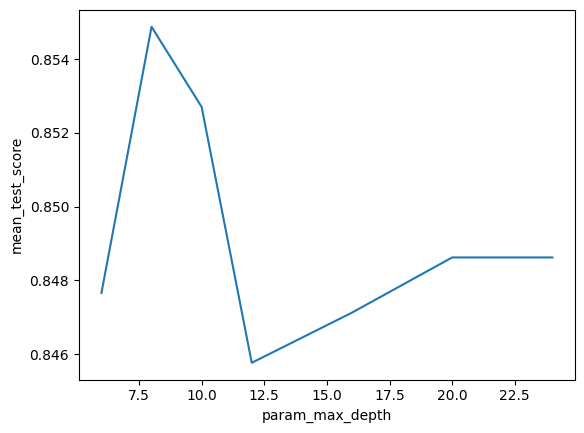

In [22]:
import seaborn as sb

sb.lineplot(x=cv_results_df['param_max_depth'], y=cv_results_df['mean_test_score'])
plt.show()

> max_depth = 8 일때, mean_test_score가 가장 높다. 

### 확인해보기

In [23]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    df_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    print('max_depth = {0} accuracy_score = {1:.4f}'.format(depth, accuracy_score(y_test, pred)))

max_depth = 6 accuracy_score = 0.8551
max_depth = 8 accuracy_score = 0.8717
max_depth = 10 accuracy_score = 0.8599
max_depth = 12 accuracy_score = 0.8571
max_depth = 16 accuracy_score = 0.8599
max_depth = 20 accuracy_score = 0.8565
max_depth = 24 accuracy_score = 0.8565


> 

In [25]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24],
} 

grid_cv = GridSearchCV(df_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [27]:
# grid_cv의 속성인 best_estimator_는 최적 하이퍼 파라미터를 학습한 객체
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
print('결정트리 예측 정확도:', accuracy_score(y_test, pred1))

결정트리 예측 정확도: 0.8717339667458432


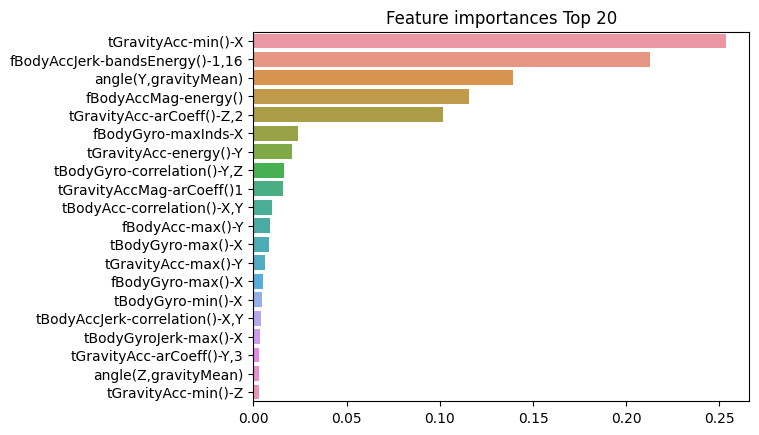

In [28]:
# 결정트리에서 각 피처의 중요도 알아보기
ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series로 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도 값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.show()
plt.title('Feature importances Top 20')
sb.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()